<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/EJERCICIO_WALMART/Ejercicio_PCA_clustering_data_Aitor.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv')
df.head()

storenum OPENDATE date_super  conversion  ...       LON  MONTH DAY  YEAR
0         1   7/1/62     3/1/97         1.0  ... -94.07141      7   1  1962
1         2   8/1/64     3/1/96         1.0  ... -93.09345      8   1  1964
2         4   8/1/65     3/1/02         1.0  ... -94.50208      8   1  1965
3         8  10/1/67     3/1/93         1.0  ... -92.75858     10   1  1967
4         7  10/1/67        NaN         NaN  ... -92.30229     10   1  1967

[5 rows x 16 columns]

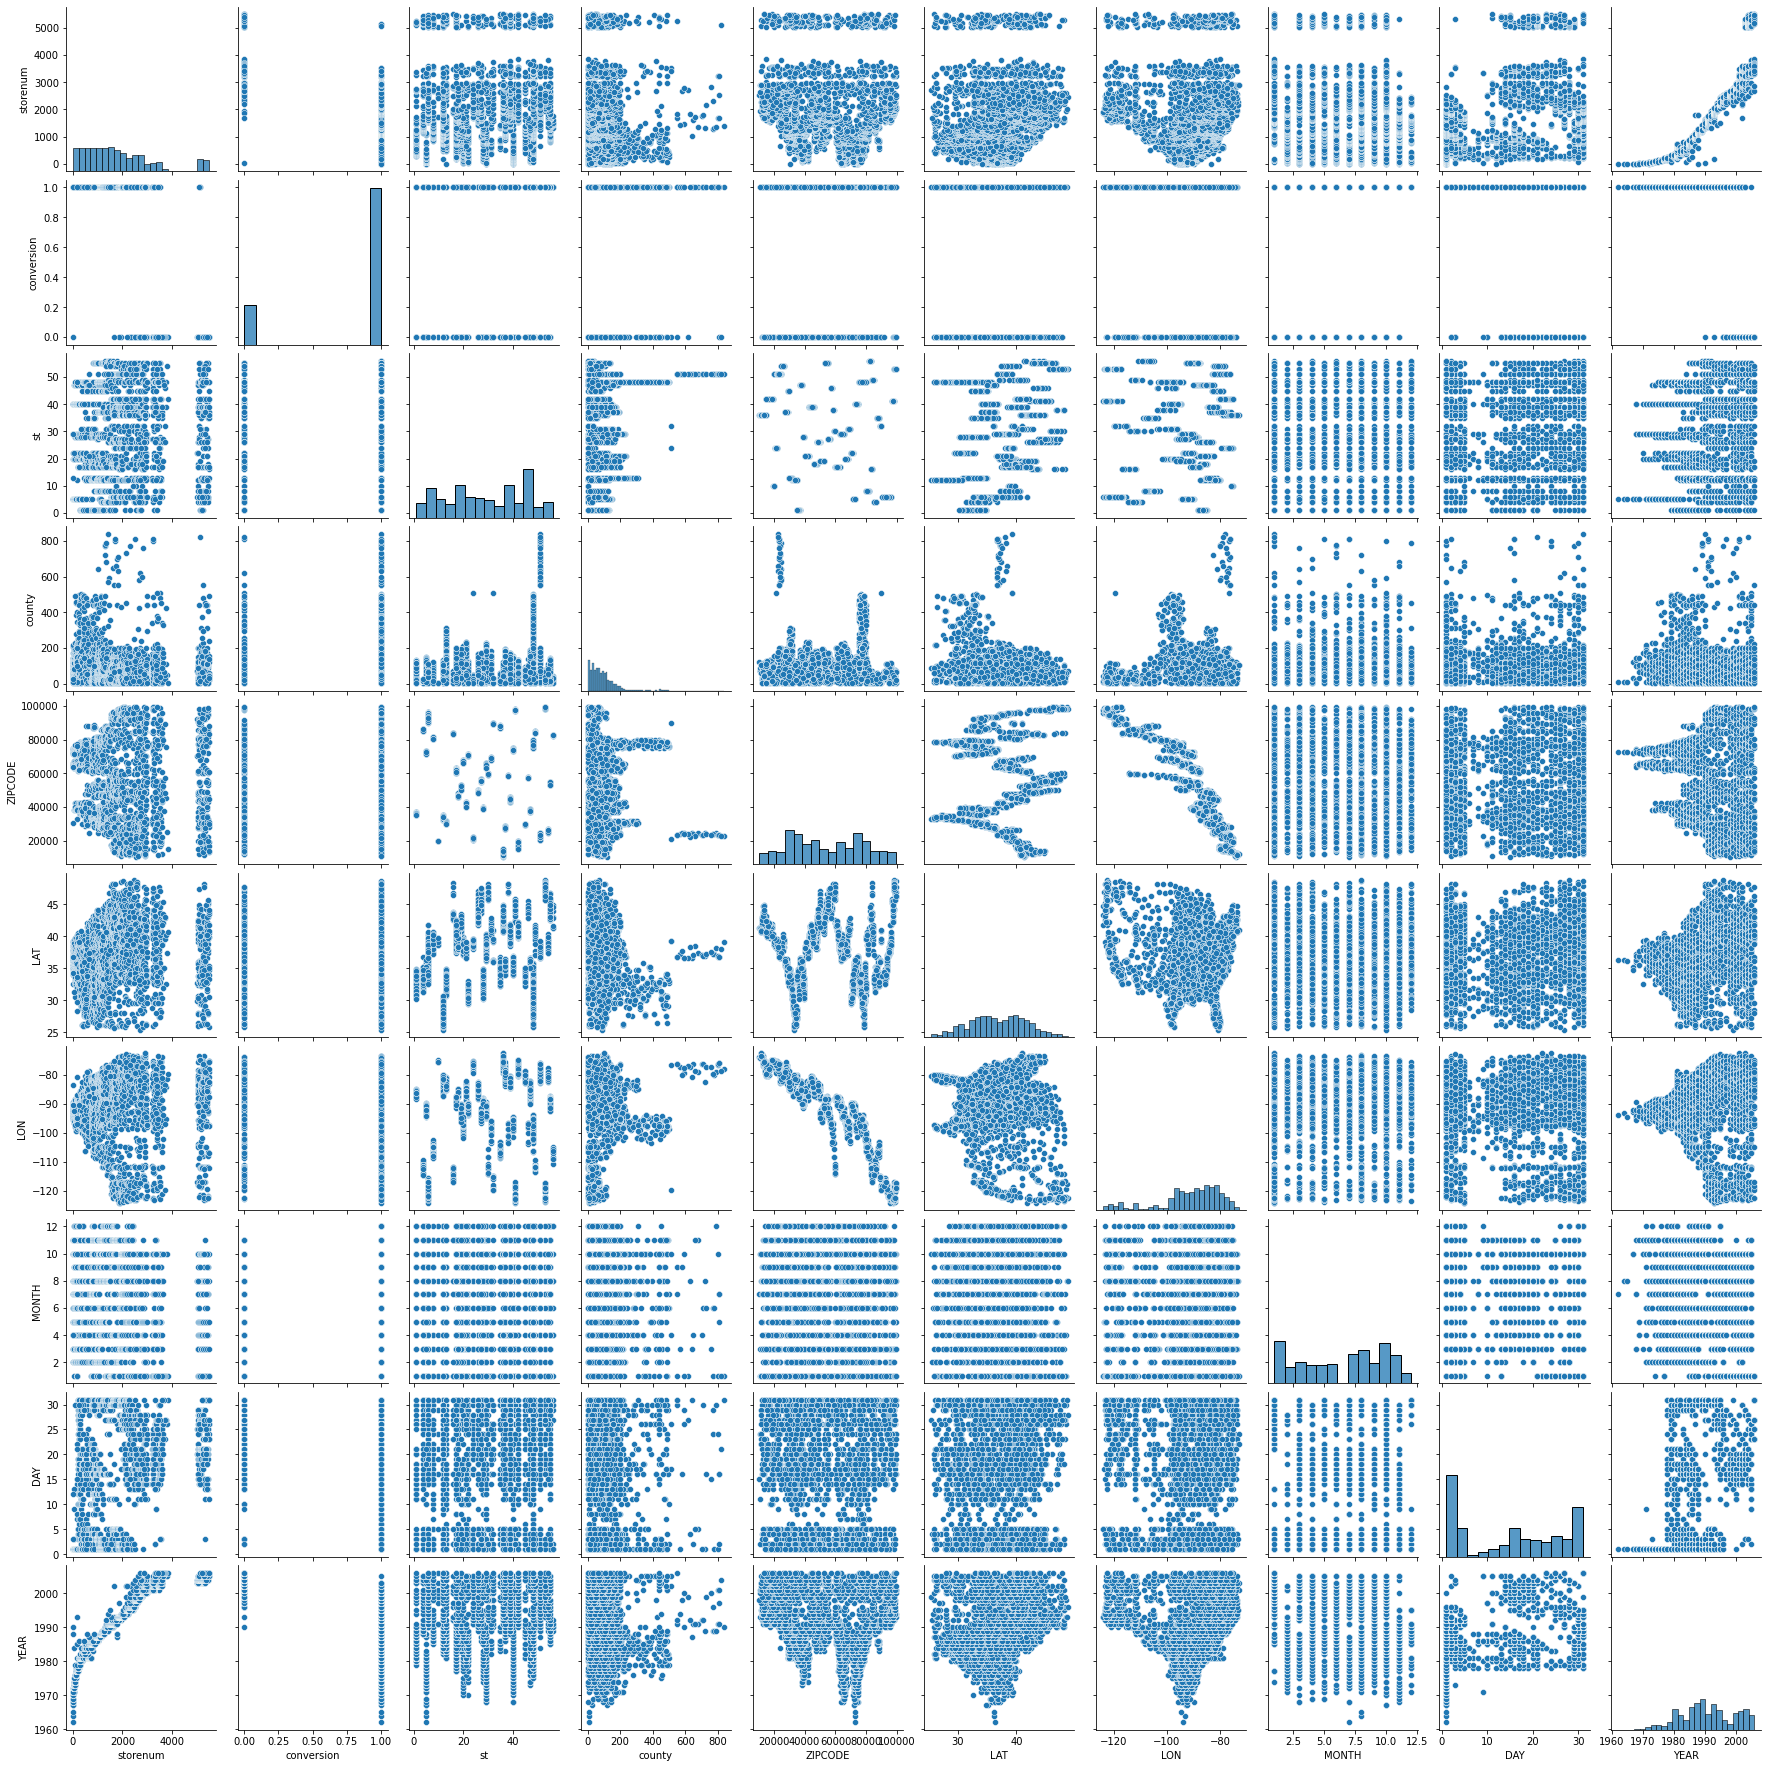

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
df_num = df.select_dtypes(include='number') # keep only numeric variables 
df_num_nonans = df_num.dropna() # remove observations with NaNs
df_num_nonans.head()

storenum  conversion  st  county  ...       LON  MONTH  DAY  YEAR
0         1         1.0   5       7  ... -94.07141      7    1  1962
1         2         1.0   5       9  ... -93.09345      8    1  1964
2         4         1.0   5       7  ... -94.50208      8    1  1965
3         8         1.0   5      29  ... -92.75858     10    1  1967
5        10         1.0  40      21  ... -94.97185      7    1  1968

[5 rows x 10 columns]

In [ ]:
print('datos originales = {}'.format(df.shape))
print('datos numericos = {}'.format(df_num.shape))
print('datos numericos sin NaNs = {}'.format(df_num_nonans.shape))

datos originales = (2992, 16)
datos numericos = (2992, 10)
datos numericos sin NaNs = (1946, 10)


In [ ]:
df2 = df_num_nonans.copy()
list (df2)

['storenum',
 'conversion',
 'st',
 'county',
 'ZIPCODE',
 'LAT',
 'LON',
 'MONTH',
 'DAY',
 'YEAR']

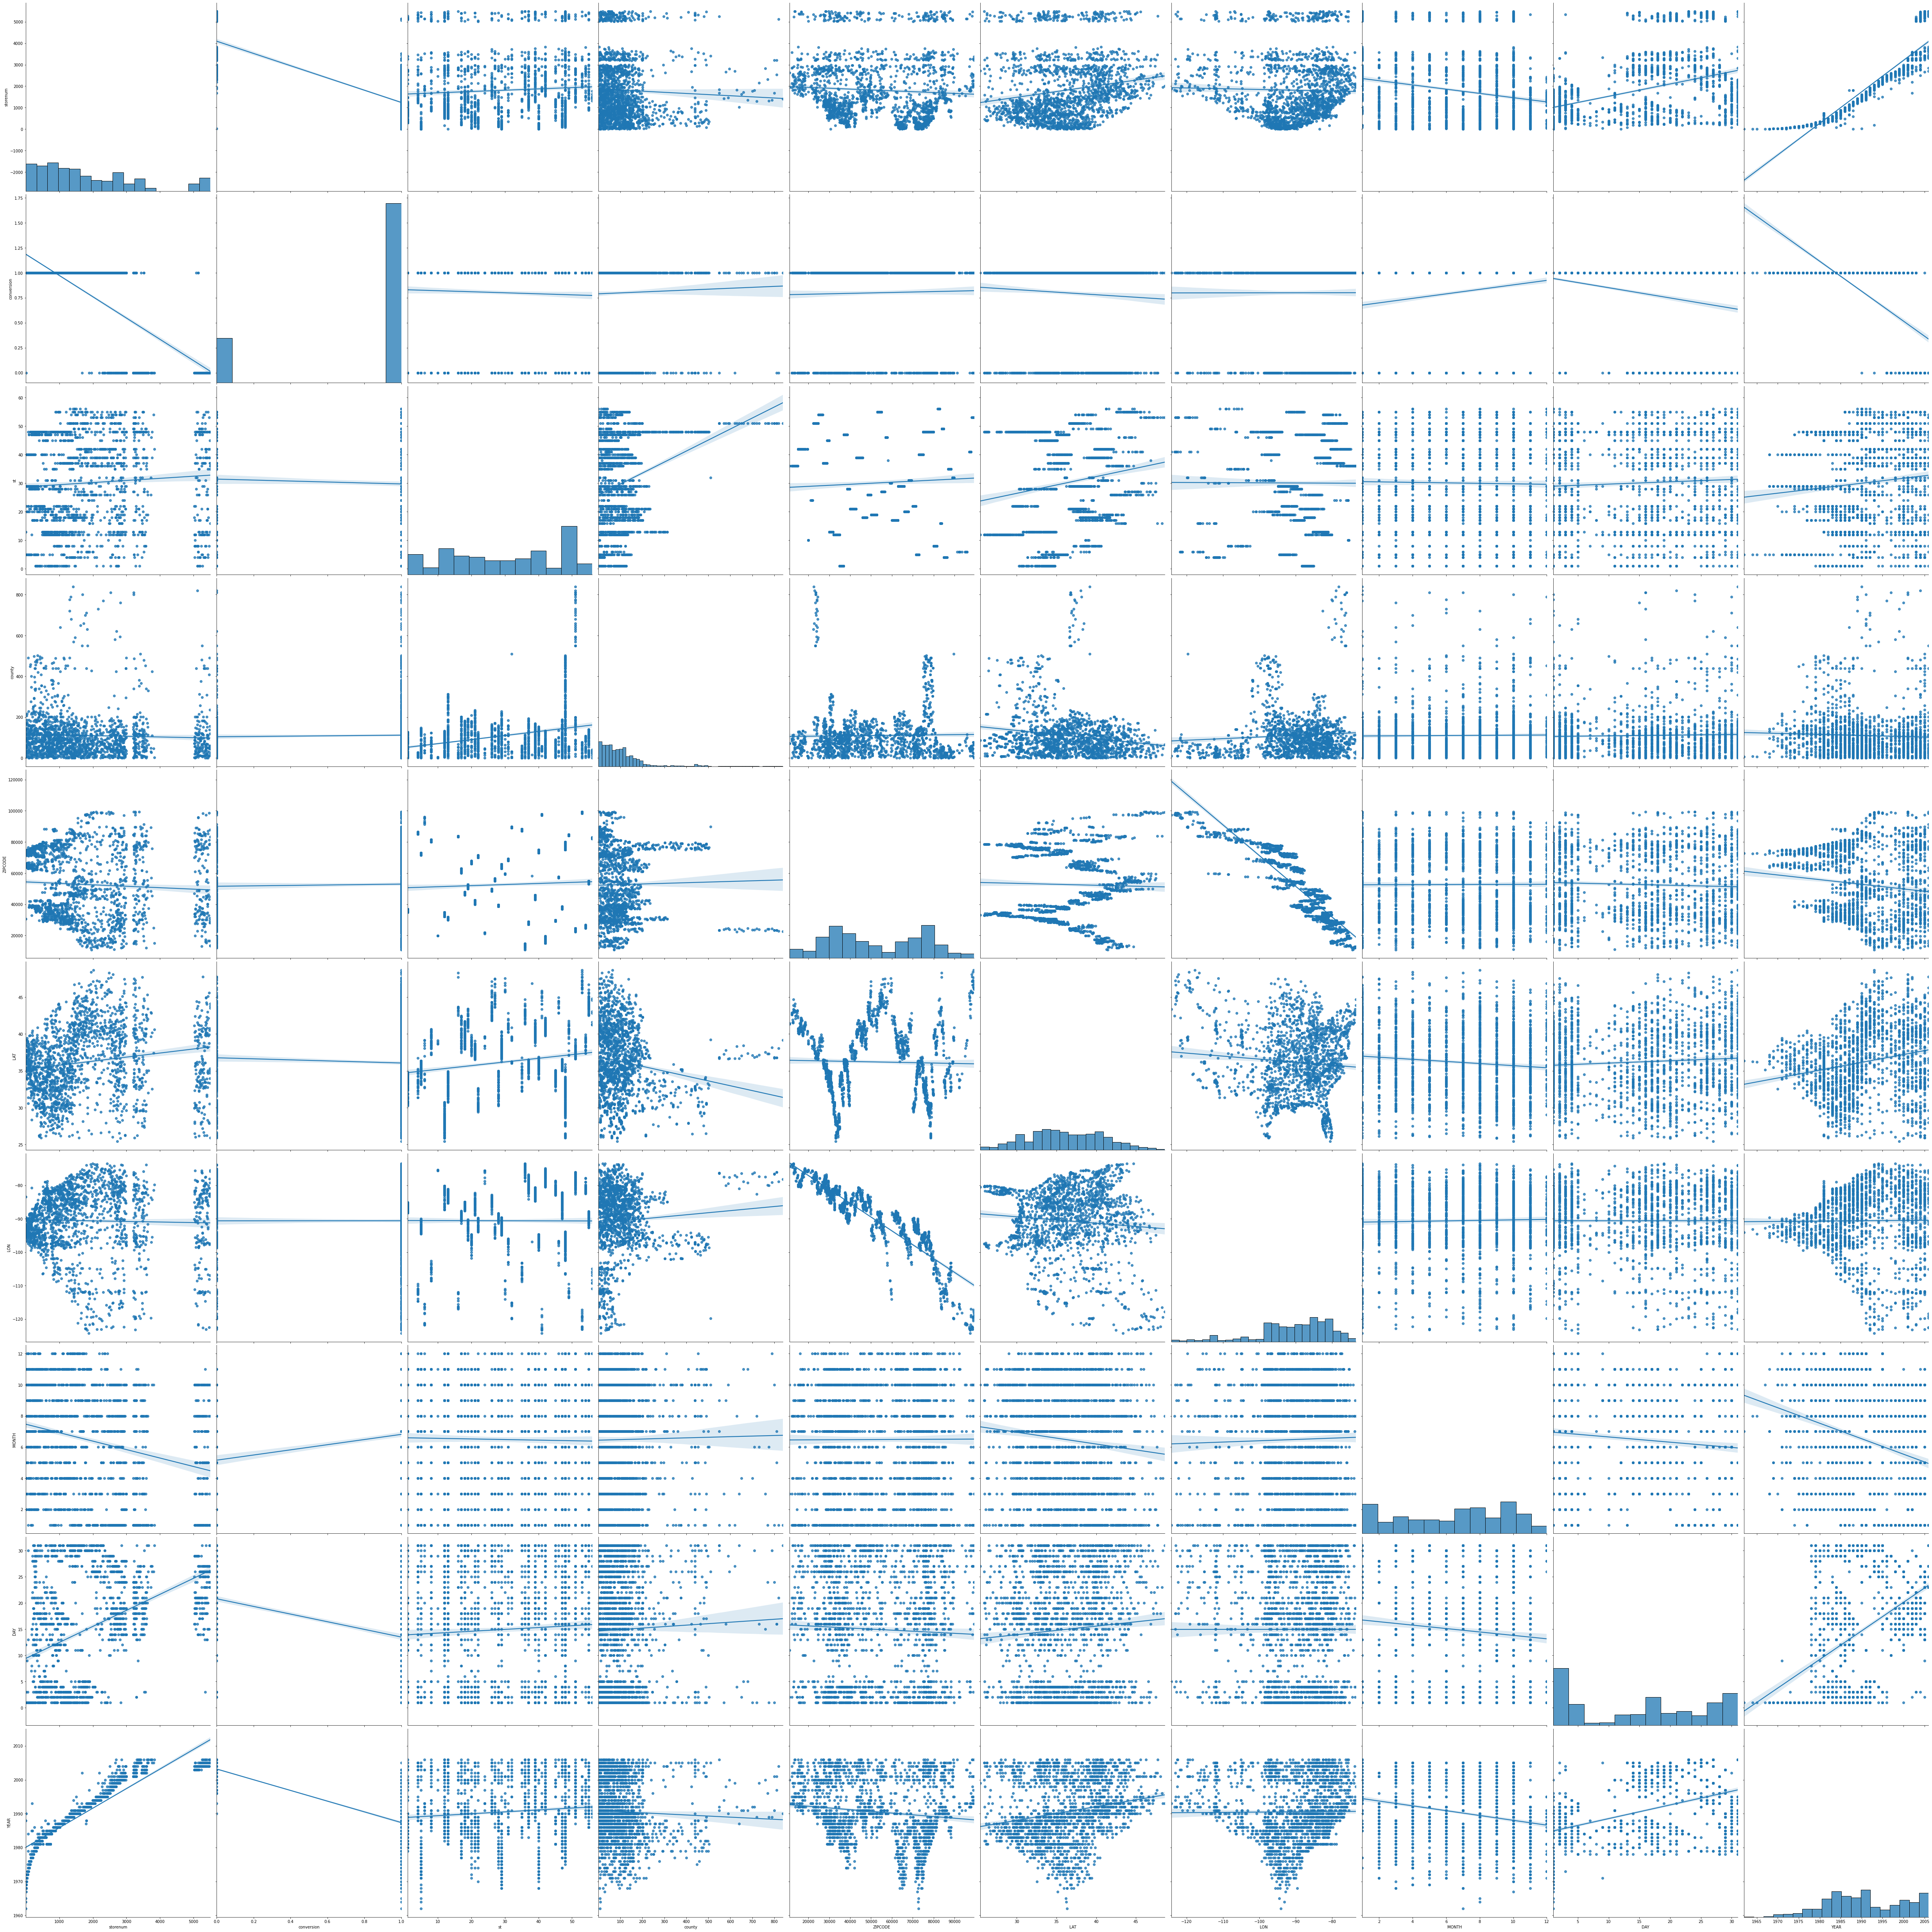

In [ ]:
import matplotlib.pyplot as plt
sns.pairplot(df2, kind="reg",height=7)
plt.show()

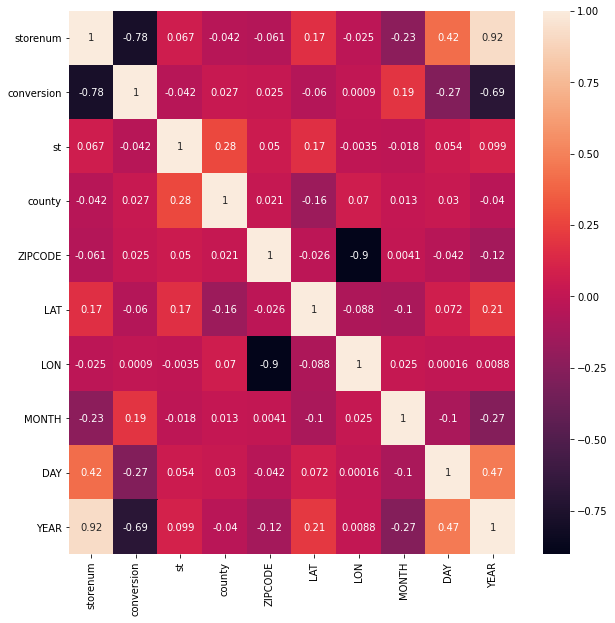

In [ ]:
plt.figure(figsize= (10, 10))
sns.heatmap(df2.corr(),annot= True)
plt.show()

In [ ]:
df2.head()

storenum  conversion  st  county  ...       LON  MONTH  DAY  YEAR
0         1         1.0   5       7  ... -94.07141      7    1  1962
1         2         1.0   5       9  ... -93.09345      8    1  1964
2         4         1.0   5       7  ... -94.50208      8    1  1965
3         8         1.0   5      29  ... -92.75858     10    1  1967
5        10         1.0  40      21  ... -94.97185      7    1  1968

[5 rows x 10 columns]

In [ ]:
format(df2.shape)

'(1946, 10)'

In [ ]:
list(df2)

['storenum',
 'conversion',
 'st',
 'county',
 'ZIPCODE',
 'LAT',
 'LON',
 'MONTH',
 'DAY',
 'YEAR']

In [ ]:
import statsmodels.api as sm

X = df2[["conversion","YEAR", "DAY"]] ## X uis the input variables (or independent variables)
y = df2["storenum"] ## Y is the output/dependent variable
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               storenum   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     5223.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:36:00   Log-Likelihood:                -14800.
No. Observations:                1946   AIC:                         2.961e+04
Df Residuals:                    1942   BIC:                         2.963e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.295e+05   3615.420    -63.477      0.000   -2.37e+05   -2.22e+05
conversion -1010.7746     38.124    -26.513      0.000   -1085.542    -936.007
YEAR         116.6090      1.810     64.436      0.000     113.060     120.158
DAY            0.1164      1.174      0.099      0.921      -2.186       2.419
==============================================================================
Omnibus:                      122.388   Durbin-Watson:                   1.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              427.413
Skew:                           0.224   Prob(JB):                     1.54e-93
Kurtosis:                       5.252   Cond. No.                     6.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

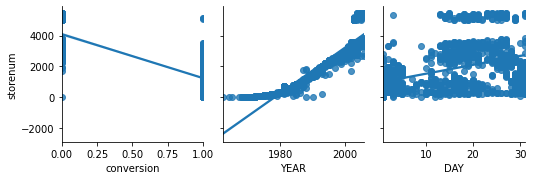

In [ ]:
sns.pairplot(df2, x_vars=["conversion","YEAR", "DAY"], y_vars=['storenum'], kind='reg')

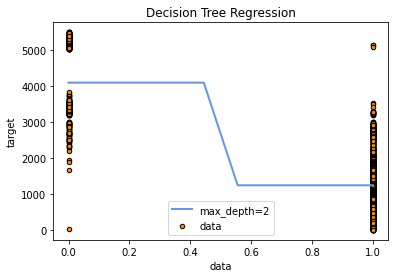

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

X=df2['conversion'].values.reshape(-1, 1)
y=df2['storenum'].values.reshape(-1, 1)

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X, y)


X_test = np.linspace(X.min(),X.max(),10).reshape(-1,1)
y_1 = regr_1.predict(X_test)

plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()